Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 36039440.51it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1575359.51it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9724995.14it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7617164.64it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Epoch 1:
Model 1: Loss = 0.0821
Model 2: Loss = 0.0821
Model 3: Loss = 0.0821
Model 1: Test Loss = 0.0906, Test Accuracy = 97.21%
Model 2: Test Loss = 0.0571, Test Accuracy = 98.11%
Model 3: Test Loss = 0.0618, Test Accuracy = 97.99%
Epoch 2:
Model 1: Loss = 0.1415
Model 2: Loss = 0.1415
Model 3: Loss = 0.1415
Model 1: Test Loss = 0.0514, Test Accuracy = 98.21%
Model 2: Test Loss = 0.0397, Test Accuracy = 98.66%
Model 3: Test Loss = 0.0480, Test Accuracy = 98.52%
Epoch 3:
Model 1: Loss = 0.0016
Model 2: Loss = 0.0016
Model 3: Loss = 0.0016
Model 1: Test Loss = 0.0436, Test Accuracy = 98.60%
Model 2: Test Loss = 0.0401, Test Accuracy = 98.67%
Model 3: Test Loss = 0.0353, Test Accuracy = 98.90%
Epoch 4:
Model 1: Loss = 0.0456
Model 2: Loss = 0.0456
Model 3: Loss = 0.0456
Model 1: Test Loss = 0.0350, Test Accuracy = 98.88%
Model 2: Test Loss = 0.0302, Test Accuracy = 99.13%
Mod

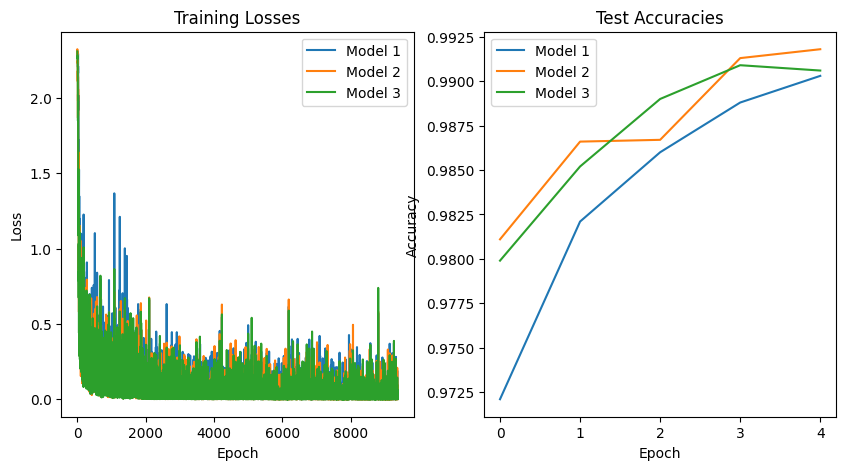

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Define the models
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.conv2 = nn.Conv2d(20, 30, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(480, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 480)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, kernel_size=5)
        self.conv2 = nn.Conv2d(30, 40, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(640, 150)
        self.fc2 = nn.Linear(150, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 640)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

# Initialize the models, loss function, and optimizer
models = [Model1(), Model2(), Model3()]
criterion = nn.CrossEntropyLoss()
optimizers = [optim.Adam(model.parameters(), lr=0.001) for model in models]

# Use a GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for model in models:
    model.to(device)

# Load the dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
test_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Train the models
losses = [[] for _ in range(len(models))]
accuracies = [[] for _ in range(len(models))]
for epoch in range(5):  # loop over the dataset multiple times
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        for j, model in enumerate(models):
            optimizer = optimizers[j]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            losses[j].append(loss.item())
    print('Epoch {}:'.format(epoch+1))
    for j, model in enumerate(models):
        print('Model {}: Loss = {:.4f}'.format(j+1, loss.item()))

    # Evaluate the models on the test set
    for j, model in enumerate(models):
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target).item()
                _, predicted = torch.max(output, 1)
                correct += (predicted == target).sum().item()
        accuracy = correct / len(test_loader.dataset)
        accuracies[j].append(accuracy)
        print('Model {}: Test Loss = {:.4f}, Test Accuracy = {:.2f}%'.format(j+1, test_loss / len(test_loader), accuracy * 100))

# Plot the training losses and test accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for j, loss in enumerate(losses):
    plt.plot(loss, label='Model {}'.format(j+1))
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for j, accuracy in enumerate(accuracies):
    plt.plot(accuracy, label='Model {}'.format(j+1))
plt.title('Test Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()